Точность модели на тестовом участке = 0.7293777134587555


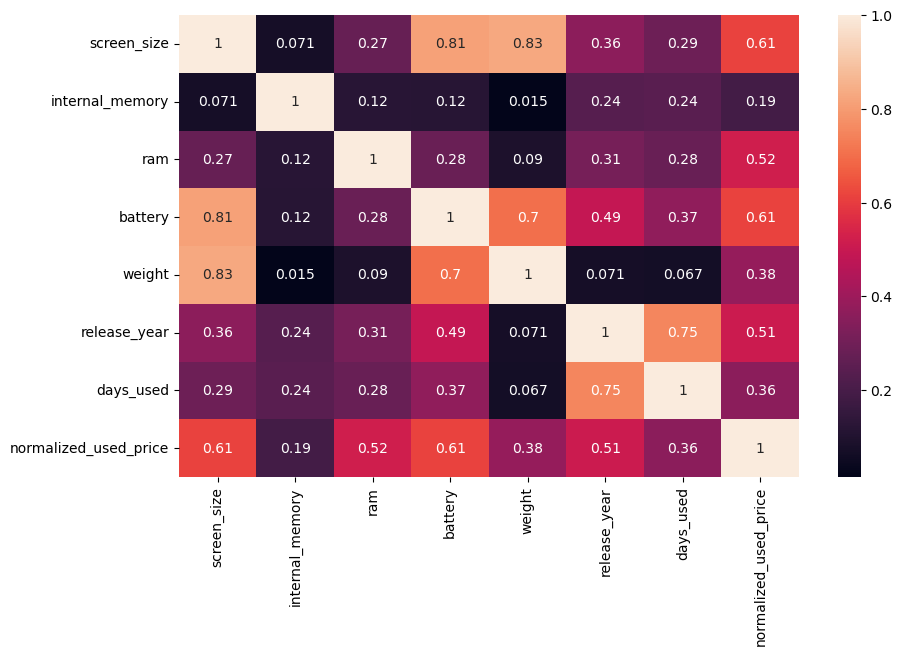

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

# Загрузка данных
PATH = "used_device_data.csv"
dataset = pd.read_csv(PATH)

important_columns = ["screen_size",
                     "internal_memory", "ram",
                     "battery", "weight",
                     "release_year", "days_used",
                     "normalized_used_price"]
dataset = dataset[important_columns].copy()

# Факторизация значений в столбцах, содержащих строковые значения
for column in dataset:
    if type(dataset[column][0]) is str:
        dataset[column] = pd.factorize(dataset[column])[0]

# Разделение выборки на тренировочную и тестовую часть, а также на параметры и эталоны
train_input, test_input, train_output, test_output = train_test_split(
    dataset[["days_used", "release_year", "weight"]],
    (dataset["normalized_used_price"] > 4).astype(int),
    test_size=0.2
)

# в train_input 80% данных с колонками 'days_used', 'release_year', 'weight'
# в test_input 20% данных с колонками 'days_used', 'release_year', 'weight'
# в train_output 80% данных с колонкой 'normalized_used_price' где normalized_used_price > 4
# в test_output 20% данных с колонкой 'normalized_used_price' где normalized_used_price > 4

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
train_input = imputer.fit_transform(train_input)
test_input = imputer.transform(test_input)

# Обучение, тестирование и проверка модели
model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")

# Вывод heatmap для визуализации корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(abs(dataset.corr()), annot=True, )
plt.show()

# Наивный байесовский алгоритм – алгоритм классификации, основанный на теореме Байеса
# с допущением о независимости признаков.
# Мультиколлинеарность – тесная корреляционная взаимосвязь между факторами.
